The [World Bank API](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures) provide access to [different data sets](https://data.worldbank.org/indicator).

In particular, it provides historical data about different [indicators](http://api.worldbank.org/v2/indicator?format=json) from different [countries](http://api.worldbank.org/v2/country?format=json)


For example, [to get the population US and Canada in year 2000](http://api.worldbank.org/v2/country/usa;can/indicator/SP.POP.TOTL?date=2000&format=json)

In [1]:
import requests
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
def get_data(country, indicator):
    query = f"http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=1000"
    response = requests.get(query)
    data = response.json()[1]
    df = pd.DataFrame(data)[['countryiso3code', 'date', 'value']]
    df.columns = ['country', 'year', 'value']
    df['year'] = pd.to_numeric(df.year)
    return df

In [3]:
usa_gdp = get_data("usa", "NY.GDP.PCAP.PP.CD")

In [4]:
usa_education = get_data("usa", "SE.SEC.CUAT.PO.MA.ZS")

- How did gdp and education change over time?
- Is there a relationship between education and gdp?
- Do the results apply in other countries?

In [5]:
df=pd.merge(usa_gdp, usa_education, left_on=['country', 'year'], 
         right_on=['country', 'year'] , how='outer')
df.columns= ['Country','Year','GDP','Education']

In [6]:
df.head()

,Country,Year,GDP,Education
0,USA,2019,NaN,NaN
1,USA,2018,62794.585652,43.79341
2,USA,2017,59927.929834,NaN
3,USA,2016,57904.201961,42.31298
4,USA,2015,56803.472433,41.15227


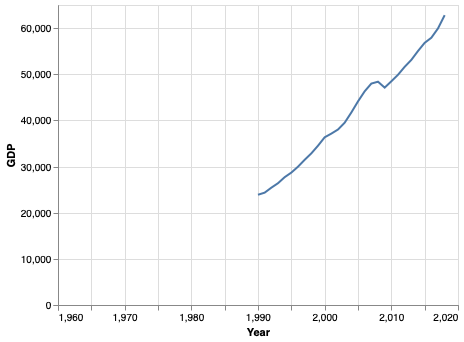

In [7]:
chart1 = alt.Chart(df).mark_line().encode(
    x='Year',
    y='GDP'
)
chart1

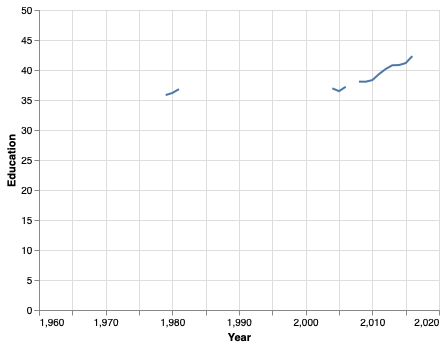

In [8]:
chart2 = alt.Chart(df).mark_line().encode(
    x='Year',
    y='Education'
)
chart2

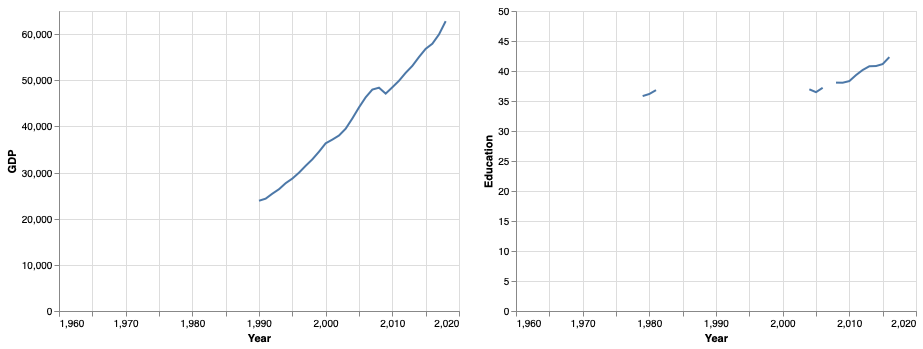

In [9]:
chart1 | chart2

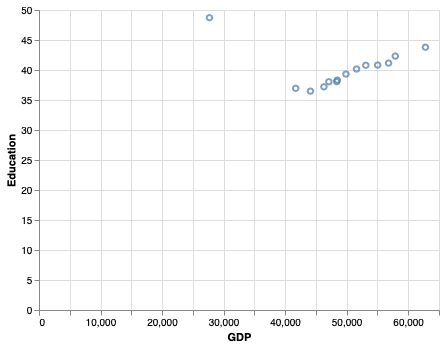

In [10]:
alt.Chart(df).mark_point().encode(
    x='GDP',
    y='Education',
    tooltip='Year'
)

In [11]:
def visualize(country):
    country_gdp = get_data(country, "NY.GDP.PCAP.PP.CD")
    country_education = get_data(country, "SE.SEC.CUAT.PO.MA.ZS")
    df=pd.merge(country_gdp, country_education, left_on=['country', 'year'], 
         right_on=['country', 'year'] , how='outer')
    df.columns= ['Country','Year','GDP','Education']
    chart = alt.Chart(df).mark_point().encode(
        x='GDP',
        y='Education',
        tooltip='Year'
    )
    return chart

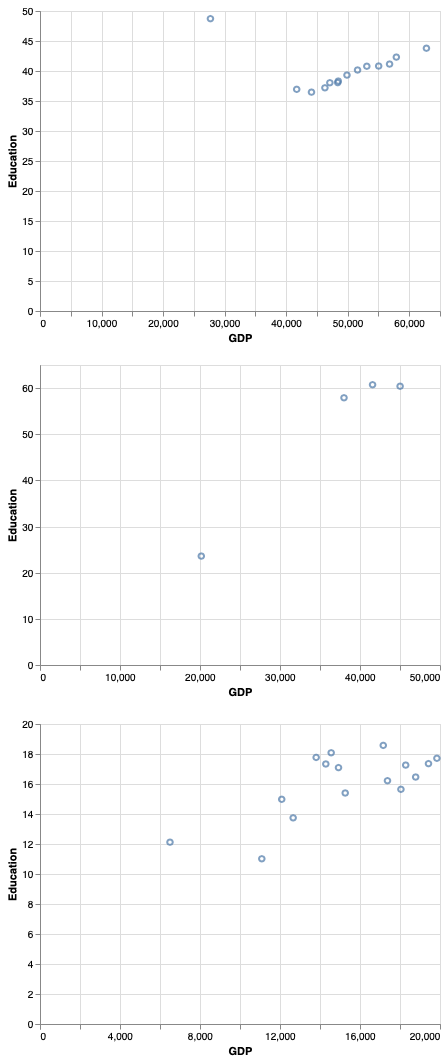

In [12]:
visualize('USA') & visualize('CAN') & visualize('MEX')